### Logbook

Hmmmmm... Let's classify class `1` and `-1`.

So, the decision hyperplane is denoted as $\mathbf{w}^T \mathbf{x} = 0$ , where $\mathbf{w}_0$ is the bias, and $\mathbf{x}_0$ is always 1. The length of $\mathbf{x}$ and $\mathbf{w}$ are `num_of_features + 1`.

The prediction is just put the input into $\mathbf{w}^T \mathbf{x}$. If it is $\geq0$, then it is predicted as class `1`. If it is $<0$, it belongs to class `-1`.

Distance of a data $\mathbf{x}$ to the hyperplane is $\frac{\left| \mathbf{w}^T  \mathbf{x} \right|}{\|\mathbf{w}\|_2}$

First we need to know how to denote the classification is correct. 

If the classification is `correct`, $y[\mathbf{w}^T \mathbf{x}] \geq 0$, otherwise if the classification is `wrong`, $y[\mathbf{w}^T \mathbf{x}]<0$. E.g. If the predicted value of a class `1` data is positive, then their product is positive. If the predicted value of a class `-1` data is negative, then their product is also positive. Otherwise, if the predicted value of a class `1` data is negative or the predicted value a class `-1` data is positive, the product is negative. 

Let's consider we already have a hyperplane that can classify the data perfectly, and `min_distance_to_class_1` equals to `min_distance_to_class_-1`.

We try to maximise the margin. The margin is the min distance of (the distance between the data and the hyperplane). The margin is denoted as $\frac{y \left| \mathbf{w}^T\mathbf{x}\right|}{\|\mathbf{w}\|_2}$. We can scale the minimum $y\left| \mathbf{w}^T\mathbf{x}\right|$ to 1, as scaling doesn't affect the direction. Then the margin will be $\frac{1}{\|\mathbf{w}\|_2}$.

Which mean, we need to maximise $\frac{1}{\|\mathbf{w}\|_2}$. It is equal to minimsing $\|\mathbf{w}\|_2$, which should always $> 0$.

So now, let's consider about the mis-classified cases, or cases that lie in the margin, i.e. $y[ \mathbf{w}^T\mathbf{x}] < 1$. In other words, $y[ \mathbf{w}^T\mathbf{x}] -1<0$. By multiplying both sides with a negative sign, it becomes $1-y[ \mathbf{w}^T\mathbf{x}]>0$. 

Let's denote $v=1-y[ \mathbf{w}^T\mathbf{x}]$.

For the above cases, e.g. 
- a class `1` case classified as `0.8`, $v = 1-(1\times0.8)=0.2$
- a class `1` case classified as `-0.3`, $v = 1-(1\times-0.3)=0.7$
- a class `-1` case classified as `-0.5`, $v = 1-(-1\times-0.5)=0.5$
- a class `-1` case classified as `-5`, $v = 1-(-1\times-5)=4$

As seen in the above examples, we can easily see that the larger the $v$, the worse the case is. So we need to minimise the $v$.

So now, let's consider how to update the weight using gradient descent. 
1. Correctly classified cases that is at the outside of the margin, i.e. $v\leq0$

    All we need is to maximise the margin, i.e. `maximise` $\frac{1}{\|\mathbf{w}\|_2}$. That means we need to `minimise` $\|\mathbf{w}\|_2$. Let's just scale it with a half and a square. Now we `minimise` $\frac{1}{2}\|\mathbf{w}\|_2^2$. The gradient is $\frac{\partial}{\partial \mathbf{w}} (\frac{1}{2}\times\|\mathbf{w}\|_2^2)= \mathbf{w}$.

2. Mis-classified cases or cases that lie in the margin.
    That is a bit tricker. We want to `minimise` $\|\mathbf{w}\|_2 + v$. We also want to control the contribution of each term, so we add a $c$. Now the equation becomes $\|\mathbf{w}\|_2 + c\times v$.

    The gradient is: $$\frac{\partial}{\partial \mathbf{w}} (\frac{1}{2}\times\|\mathbf{w}\|_2^2 + c \times v)= \mathbf{w} + \frac{\partial}{\partial \mathbf{w}}(c \times v) $$ $$= \mathbf{w} + \frac{\partial}{\partial \mathbf{w}}(c \times (1-y[ \mathbf{w}^T\mathbf{x}]))$$ $$= \mathbf{w} - \frac{\partial}{\partial \mathbf{w}}(c y[ \mathbf{w}^T\mathbf{x}])$$ $$=\mathbf{w}-cy\mathbf{x}$$

Great!! Finally the maths are done. What I need are the two $\frac{\partial}{\partial \mathbf{w}}$, whatever it called. Just update the $weights = weights - LearningRate \times \frac{\partial}{\partial \mathbf{w}}$

### Import

In [1993]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random

print(f"np.__version__: {np.__version__}")
print(f"pd.__version__: {pd.__version__}")

np.__version__: 2.1.3
pd.__version__: 2.2.3


### Fetch the data from the Internet and save it as csv
The following cell only needs to run once. 

In [ ]:
# from ucimlrepo import fetch_ucirepo 

# # fetch dataset 
# breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# # data (as pandas dataframes) 
# X = breast_cancer_wisconsin_original.data.features 
# y = breast_cancer_wisconsin_original.data.targets 

# data = pd.concat([y, X], axis=1)
# data.to_csv("data.csv", index=False)

### Read the data to X and y, and replace B and M (2&4) with 0 and 1

Note that there are missing values. As we got a large dataset, we will just drop the records.

In [1998]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# drop the rows with nan
data.dropna(inplace=True)
X = data.drop("Class", axis=1)
y = data['Class']
y.replace({2: -1, 4: 1}, inplace=True)
print(X.shape, y.shape)

(683, 9) (683,)


### Code the `SVMBinaryClassifier` Class

In [2004]:
class SVMBinaryClassifier:
    def __init__(self, num_of_features, c=999):
        self.weights = random.rand(num_of_features + 1, 1)-0.5 # weights[0] is the bias (i.e. the b in ax+b)
        self.c = c
    
    # one X,y pair at a time
    def predict(self, input):
        if len(input) != len(self.weights)-1:
            raise Exception("The input does not match the number of features.")
        input = np.concat(([1], input)) # input[0] is always 1, for the bias weights[0]
        pred = input.dot(self.weights)
        return pred
    
    def predict_list(self, input_list):
        pred = []
        for input in input_list:
            pred.append(self.predict(input)[0])
        return pred
        

    def train_one_cycle(self, inputs, expected_outputs, learning_rate=0.1, c=None):
        if len(inputs[0]) != len(self.weights)-1:
            raise Exception("The input does not match the number of features.")
        if c != None:
            self.c = c

        for X, y in zip(inputs, expected_outputs):
            pred = self.predict(X)
            X = np.concat(([1], X))
            v = 1 - y * pred
            if v <= 0: # good prediction, not inside the margin
                d_dw = self.weights
            else:
                d_dw = self.weights - (self.c * y * X.T).reshape(-1, 1)
            self.weights -= learning_rate * d_dw

            
            

### Test with simple data

In [1976]:
svc = SVMBinaryClassifier(2)

inputs = np.array([[5, 4], [3, 6], [-1, -6], [-3, -4]])
outputs = [-1, -1, 1, 1]

for input in inputs:
  pred = svc.predict(input)
  print(pred)

[3.52852169]
[3.59922428]
[-3.64547065]
[-3.57476806]


[-4.08284113]
[-4.37187668]
[2.60543317]
[2.31639762]


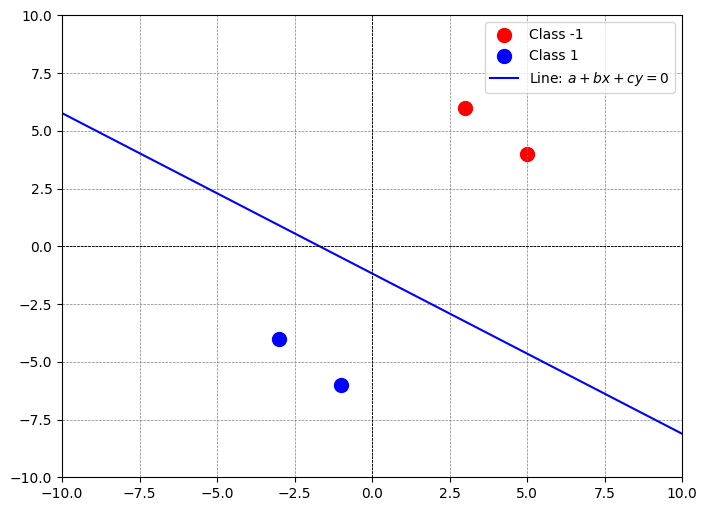

In [1980]:
svc.train_one_cycle(inputs, outputs, learning_rate=0.01, c=10)
for input in inputs:
  pred = svc.predict(input)
  print(pred)

# Define the coefficients
a = svc.weights[0, 0]
b = svc.weights[1, 0]
c = svc.weights[2, 0]

# Create x values
x = np.linspace(-10, 10, 10)

# Calculate y values based on the rearranged equation
y = (-a - b * x) / c

# Separate the inputs based on their outputs
class_neg = inputs[np.array(outputs) == -1]
class_pos = inputs[np.array(outputs) == 1]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot negative class points
plt.scatter(class_neg[:, 0], class_neg[:, 1], color='red', label='Class -1', s=100)

# Plot positive class points
plt.scatter(class_pos[:, 0], class_pos[:, 1], color='blue', label='Class 1', s=100)

# Add labels and title
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.plot(x, y, label='Line: $a + bx + cy = 0$', color='blue')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

### Test with non-perfect data (code provided by GPT)
Just a bit too lazy to code my own

In [1981]:
svc = SVMBinaryClassifier(2)

# Parameters for the dataset
num_samples = 100
class_1_samples = 60  # Number of samples for class 1
class_2_samples = 40  # Number of samples for class -1

# Generate data for class 1 (output = 1)
class_1_x = np.random.normal(loc=2, scale=1, size=(class_1_samples, 2))
class_1_y = np.ones(class_1_samples)

# Generate data for class -1 (output = -1)
class_2_x = np.random.normal(loc=-2, scale=1, size=(class_2_samples, 2))
class_2_y = -1 * np.ones(class_2_samples)

# Introduce some overlap for soft-margin
overlap_samples = 10
overlap_x = np.random.normal(loc=0, scale=1, size=(overlap_samples, 2))
overlap_y = np.random.choice([-1, 1], size=overlap_samples)

# Combine the data
inputs = np.vstack((class_1_x, class_2_x, overlap_x))
outputs = np.concatenate((class_1_y, class_2_y, overlap_y))

# Shuffle the dataset
indices = np.arange(len(outputs))
np.random.shuffle(indices)
inputs = inputs[indices]
outputs = outputs[indices]

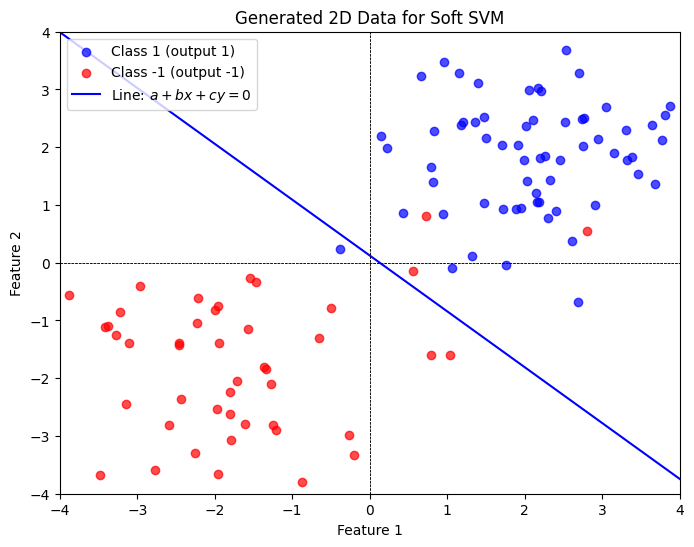

In [1988]:
svc.train_one_cycle(inputs, outputs, learning_rate=0.001, c=10)

# Define the coefficients
a = svc.weights[0, 0]
b = svc.weights[1, 0]
c = svc.weights[2, 0]

# Create x values
x = np.linspace(-4, 4, 10)

# Calculate y values based on the rearranged equation
y = (-a - b * x) / c


plt.figure(figsize=(8, 6))
plt.scatter(inputs[outputs == 1][:, 0], inputs[outputs == 1][:, 1], color='blue', label='Class 1 (output 1)', alpha=0.7)
plt.scatter(inputs[outputs == -1][:, 0], inputs[outputs == -1][:, 1], color='red', label='Class -1 (output -1)', alpha=0.7)
plt.title('Generated 2D Data for Soft SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.plot(x, y, label='Line: $a + bx + cy = 0$', color='blue')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.grid()
plt.legend()
plt.show()

### Test with the data

In [2108]:
svc = SVMBinaryClassifier(9)

preds = []
preds_test = []

pred = svc.predict_list(X.values[:450])
preds.append(pred)
pred_test = svc.predict_list(X.values[450:])
preds_test.append(pred_test)

for i in range(50):
    pred = []
    svc.train_one_cycle(X.values[:450], y.values[:450], learning_rate=0.0001, c=15)
    pred = svc.predict_list(X.values[:450])
    preds.append(pred)
    pred_test = svc.predict_list(X.values[450:])
    preds_test.append(pred_test)

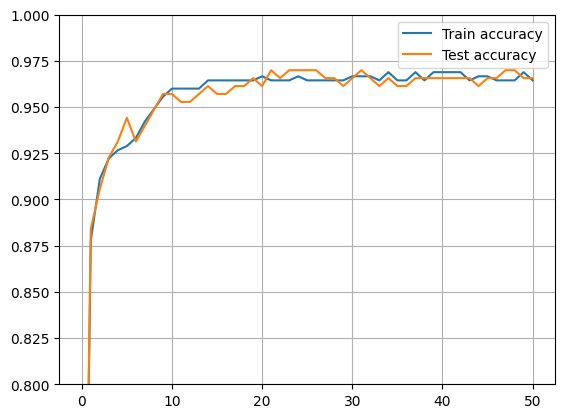

In [2109]:
preds_binary_train = np.sign(preds)
preds_binary_test = np.sign(preds_test)
train_accuracy = []
test_accuracy = []
for ptr, pte in zip(preds_binary_train, preds_binary_test):
  train_accuracy.append(sum(ptr == y.values[:450])/len(ptr))
  test_accuracy.append(sum(pte == y.values[450:])/len(pte))

plt.plot(train_accuracy, label="Train accuracy")
plt.plot(test_accuracy, label="Test accuracy")
plt.ylim(0.8, 1)
plt.grid()
plt.legend()